In [1]:
import uproot3 as uproot
import hist
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import os
import subprocess

Conducting Signal Scale
1.7858062532109062e-06
1.7856456076609939e-06
8.928064433155455e-07
7.142857099468013e-06
7.142856949325258e-06
1.7857911933673409e-06
7.142857151006506e-06
1.7857659190865346e-06
1.7857596454673497e-06
1.785705434607468e-06
1.7857223960845231e-06
1.7856305874290446e-06
8.928889483345375e-07
7.142857192189328e-06
1.785674230963187e-06
1.785779117114866e-06
Conducting Background Scale
1.7856007747369896e-06
7.142857098135338e-06
1.7856725322670856e-06
7.142856955426226e-06
7.142857107715654e-06
7.14285727552879e-06
1.7857570152339475e-06
7.142856986555878e-06
7.1428572956059695e-06
1.7854159108088792e-06
7.142857120644276e-06
1.7858800664116275e-06
1.7856187735152058e-06
1.7860725055865498e-06
1.7858892888060105e-06
1.7857908900832092e-06
8.927947870903758e-07
7.142857273471385e-06
1.785483460220992e-06
8.928108251983881e-07
1.7854943153644062e-06
1.7856552307112647e-06
1.7855883351423312e-06
1.7857660712496972e-06
8.929216258619379e-07
1.7855930051599946e-06
8.9

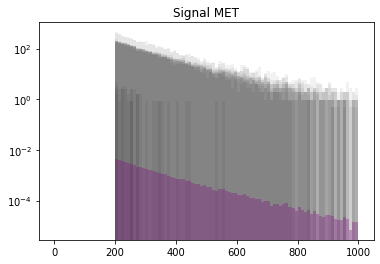

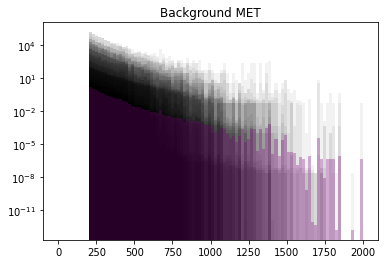

Number of Signal Events
40481
Number of Background Events
430831
Statistics of Inputs
Signals
['VBFSUSY_13_Higgsino_150_mmjj_500_-1_1100s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1104s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-888', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_-116', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_-212', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1101s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_-102', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1105s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1108s_100000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1103s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1107s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1109s_100000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-544', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_-110', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1102s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1106s_50000n']
Signal Cross Sections
[0.08646, 0.0865, 0.08638, 0.59, 0.5896, 0.08646, 0.5896, 0.08634, 0.08646, 0.0866, 0.08649, 0.08652, 0

In [2]:
#Define File Pathways
SignalDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/"
EWKBackgroundDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Background/EWKBackground/"
QCDBackgroundDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Background/QCDBackground/"
Signals = os.listdir(SignalDirectory)
EWKBackgrounds = os.listdir(EWKBackgroundDirectory)
QCDBackgrounds = os.listdir(QCDBackgroundDirectory)

TotalEvents = 0
SignalArray = []
SignalPathArray = []
SignalBranches = []

EWKBackgroundArray = []
EWKBackgroundPathArray = []
EWKBackgroundBranches = []

QCDBackgroundArray = []
QCDBackgroundPathArray = []
QCDBackgroundBranches = []

S_CrossSections = []
EWKB_CrossSections = []
QCDB_CrossSections = []
#Files to be moved to the faulty files folder.
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_1000_4000_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_7000_10000_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_10000_-1_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_4000_7000_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_1000_4000_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_4000_7000_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_7000_10000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_3000_6000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_4000_7000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_8000_11000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_6000_9000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_9000_12000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_10000_-1_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_7000_10000_-666')

#Take Cross Section Data, same order as item lists.

z=0
for item in Signals:
    composite = ["""grep "Cross-section" """+SignalDirectory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
    CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
    S_CrossSections.append(float(CrossSectionOutput.stdout))
    z+=1

z=0
for item in EWKBackgrounds:
    composite = ["""grep "Cross-section" """+EWKBackgroundDirectory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
    CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
    EWKB_CrossSections.append(float(CrossSectionOutput.stdout))
    z += 1

z=0
for item in QCDBackgrounds:
    composite = ["""grep "Cross-section" """+QCDBackgroundDirectory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
    CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
    QCDB_CrossSections.append(float(CrossSectionOutput.stdout))
    z+=1

#Define Signal and Background variable arrays for graphing.
S_MET = []
S_j1PT = []
S_mjj = []
S_j1Eta = []
S_j1Phi = []
S_j2PT = []
S_j2Eta = []
S_j2Phi = []
S_weight = []

EWKB_MET = []
EWKB_j1PT = []
EWKB_mjj = []
EWKB_j1Eta = []
EWKB_j1Phi = []
EWKB_j2PT = []
EWKB_j2Eta = []
EWKB_j2Phi = []
EWKB_weight = []

QCDB_MET = []
QCDB_j1PT = []
QCDB_mjj = []
QCDB_j1Eta = []
QCDB_j1Phi = []
QCDB_j2PT = []
QCDB_j2Eta = []
QCDB_j2Phi = []
QCDB_weight = []

B_MET = []
B_j1PT = []
B_mjj = []
B_j1Eta = []
B_j1Phi = []
B_j2PT = []
B_j2Eta = []
B_j2Phi = []
B_weight = []

#This loops through all input trees, applies the cut mask, then adds it to the arrays to graph.
for item in Signals:
    SignalPathArray.append("".join([SignalDirectory,item,"/analysis/histograms.root"]))
for item in SignalPathArray:
    SignalArray.append(uproot.open(item)['allev/hftree'])
for item in SignalArray:
    SignalBranches.append(item.arrays())
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    for element in item[b"MET"][mask]:
        S_MET.append(element)
    for element in item[b"j1PT"][mask]:
        S_j1PT.append(element)
    for element in item[b"mjj"][mask]:
        S_mjj.append(element)
    for element in item[b"j1Eta"][mask]:
        S_j1Eta.append(element)
    for element in item[b"j1Phi"][mask]:
        S_j1Phi.append(element)
    for element in item[b"j2PT"][mask]:
        S_j2PT.append(element)
    for element in item[b"j2Eta"][mask]:
        S_j2Eta.append(element)
    for element in item[b"j2Phi"][mask]:
        S_j2Phi.append(element)

for item in EWKBackgrounds:
    EWKBackgroundPathArray.append("".join([EWKBackgroundDirectory,item,"/analysis/histograms.root"]))
for item in EWKBackgroundPathArray:
    EWKBackgroundArray.append(uproot.open(item)['allev/hftree'])
for item in EWKBackgroundArray:
    EWKBackgroundBranches.append(item.arrays())
for item in EWKBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    for element in item[b"MET"][mask]:
        EWKB_MET.append(element)
    for element in item[b"j1PT"][mask]:
        EWKB_j1PT.append(element)
    for element in item[b"mjj"][mask]:
        EWKB_mjj.append(element)
    for element in item[b"j1Eta"][mask]:
        EWKB_j1Eta.append(element)
    for element in item[b"j1Phi"][mask]:
        EWKB_j1Phi.append(element)
    for element in item[b"j2PT"][mask]:
        EWKB_j2PT.append(element)
    for element in item[b"j2Eta"][mask]:
        EWKB_j2Eta.append(element)
    for element in item[b"j2Phi"][mask]:
        EWKB_j2Phi.append(element)

for item in QCDBackgrounds:
    QCDBackgroundPathArray.append("".join([QCDBackgroundDirectory,item,"/analysis/histograms.root"]))
for item in QCDBackgroundPathArray:
    QCDBackgroundArray.append(uproot.open(item)['allev/hftree'])
for item in QCDBackgroundArray:
    QCDBackgroundBranches.append(item.arrays())
for item in QCDBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    for element in item[b"MET"][mask]:
        QCDB_MET.append(element)
    for element in item[b"j1PT"][mask]:
        QCDB_j1PT.append(element)
    for element in item[b"mjj"][mask]:
        QCDB_mjj.append(element)
    for element in item[b"j1Eta"][mask]:
        QCDB_j1Eta.append(element)
    for element in item[b"j1Phi"][mask]:
        QCDB_j1Phi.append(element)
    for element in item[b"j2PT"][mask]:
        QCDB_j2PT.append(element)
    for element in item[b"j2Eta"][mask]:
        QCDB_j2Eta.append(element)
    for element in item[b"j2Phi"][mask]:
        QCDB_j2Phi.append(element)

        
#For each item(Generation), this takes the Cross sections of each and divides it by the sum of its weights. The index and item list should match up.
#then takes the masked backround and multiplies it by the scale, then adds it to the background arrays.
i = 0

print("Conducting Signal Scale")
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    scale = (S_CrossSections[i]/sum(item[b"weight"]))
    i += 1
    print(scale)
    ScaledS_weight = item[b"weight"][mask]*scale
    for element in ScaledS_weight:
        S_weight.append(element)
i = 0

print("Conducting Background Scale")
for item in EWKBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    scale = (EWKB_CrossSections[i]/sum(item[b"weight"]))
    i += 1
    print(scale)
    ScaledEWKB_weight = item[b"weight"][mask]*scale
    for element in ScaledEWKB_weight:
        EWKB_weight.append(element)
i = 0

for item in QCDBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    scale = (QCDB_CrossSections[i]/sum(item[b"weight"]))
    i += 1
    print(scale)
    ScaledQCDB_weight = item[b"weight"][mask]*scale
    for element in ScaledQCDB_weight:
        QCDB_weight.append(element)

#Combines the background arrays into one summed backround
B_MET = np.append(EWKB_MET,QCDB_MET)
B_j1PT = np.append(EWKB_j1PT,QCDB_j1PT)
B_mjj = np.append(EWKB_mjj,QCDB_mjj)
B_j1Eta = np.append(EWKB_j1Eta,QCDB_j1Eta)
B_j1Phi = np.append(EWKB_j1Phi,QCDB_j1Phi)
B_j2PT = np.append(EWKB_j2PT,QCDB_j2PT)
B_j2Eta = np.append(EWKB_j2Eta,QCDB_j2Eta)
B_j2Phi = np.append(EWKB_j2Phi,QCDB_j2Phi)
B_weight = np.append(EWKB_weight,QCDB_weight)

#Graph Signals  
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    plt.hist(item[b"MET"][mask],bins=100,range=(0,1000),weights = item[b"weight"][mask], alpha=0.05, color='black')
plt.hist(S_MET,bins=100,range=(0,1000),weights = S_weight, alpha=0.3, color='purple')
plt.yscale('log')
plt.title("Signal MET")
plt.show()

#Graph Backgrounds
for item in EWKBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    plt.hist(item[b"MET"][mask],bins=100,range=(0,2000),weights = item[b"weight"][mask], alpha=0.05, color='black')

for item in QCDBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    plt.hist(item[b"MET"][mask],bins=100,range=(0,2000),weights = item[b"weight"][mask], alpha=0.05, color='black')

plt.hist(B_MET,bins=100,range=(0,2000),weights = B_weight, alpha=0.3, color='purple')
plt.yscale('log')
plt.title("Background MET")
plt.show()

NumberOfSignalEvents = len(S_MET)
NumberOfBackgroundEvents = len(B_MET)

print("Number of Signal Events")
print(NumberOfSignalEvents)

print("Number of Background Events")
print(NumberOfBackgroundEvents)

print("Statistics of Inputs")
print("Signals")
print(Signals)
print("Signal Cross Sections")
print(S_CrossSections)
print("background, EWK")
print(EWKBackgrounds)
print("EWKB Cross Sections")
print(EWKB_CrossSections)
print("background, QCD")
print(QCDBackgrounds)
print("QCDB Cross Sections")
print(QCDB_CrossSections)


In [3]:
S_Etachange = np.subtract(S_j1Eta, S_j2Eta) 
BEWK_Etachange = np.subtract(EWKB_j1Eta, EWKB_j2Eta) 
BQCD_Etachange = np.subtract(QCDB_j1Eta, QCDB_j2Eta)
B_Etachange = np.append(BEWK_Etachange,BQCD_Etachange)

In [4]:
#Write Statistics to CSV file.
import csv

# open the file in the write mode
f = open('/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Combination_Output.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerow(Signals)
writer.writerow(S_CrossSections)
writer.writerow(EWKBackgrounds)
writer.writerow(EWKB_CrossSections)
writer.writerow(QCDBackgrounds)
writer.writerow(QCDB_CrossSections)
# close the file
f.close()

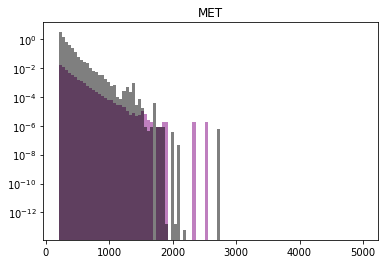

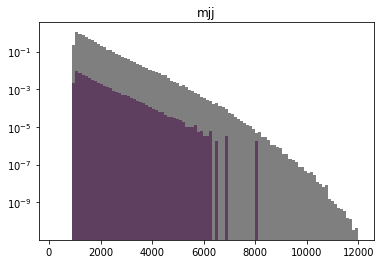

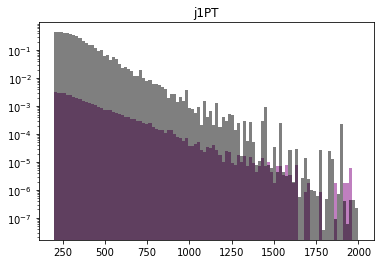

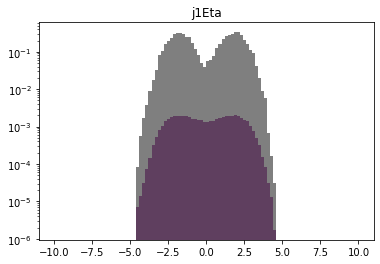

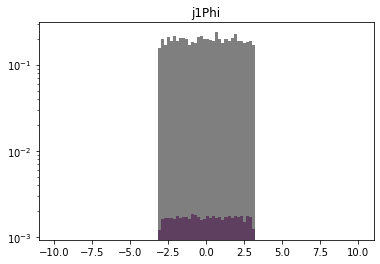

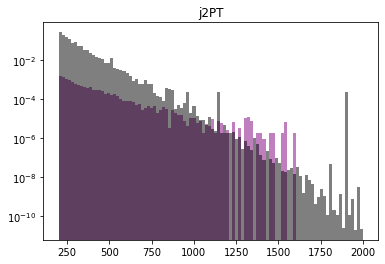

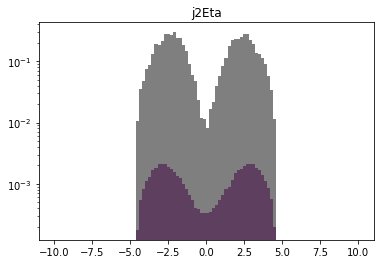

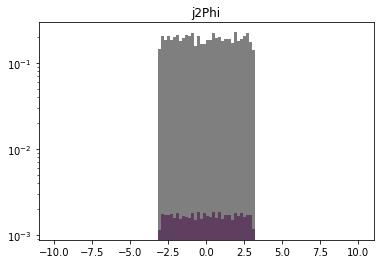

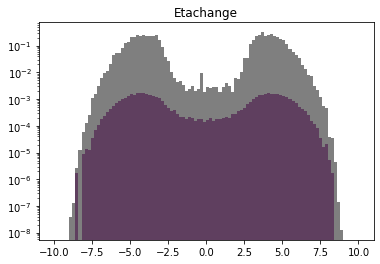

In [5]:
##Plot Graphs
#MET
plt.hist(S_MET,bins=100,range=(200,5000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_MET,bins=100,range=(200,5000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("MET")
plt.show()
#mjj
plt.hist(S_mjj,bins=100,range=(200,12000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_mjj,bins=100,range=(200,12000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("mjj")
plt.show()
#j1PT
plt.hist(S_j1PT,bins=100,range=(200,2000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j1PT,bins=100,range=(200,2000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j1PT")
plt.show()
#j1Eta
plt.hist(S_j1Eta,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j1Eta,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j1Eta")
plt.show()
#j1Phi
plt.hist(S_j1Phi,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j1Phi,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j1Phi")
plt.show()
#j2PT
plt.hist(S_j2PT,bins=100,range=(200,2000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j2PT,bins=100,range=(200,2000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j2PT")
plt.show()
#j2Eta
plt.hist(S_j2Eta,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j2Eta,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j2Eta")
plt.show()
#j2Phi
plt.hist(S_j2Phi,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j2Phi,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j2Phi")
plt.show()
#Etachange
plt.hist(S_Etachange,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_Etachange,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("Etachange")
plt.show()